In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Get all the data
conn = sqlite3.connect("offers.db")

query = """
SELECT * FROM offers
"""
df = pd.read_sql_query(query, conn)

conn.close()

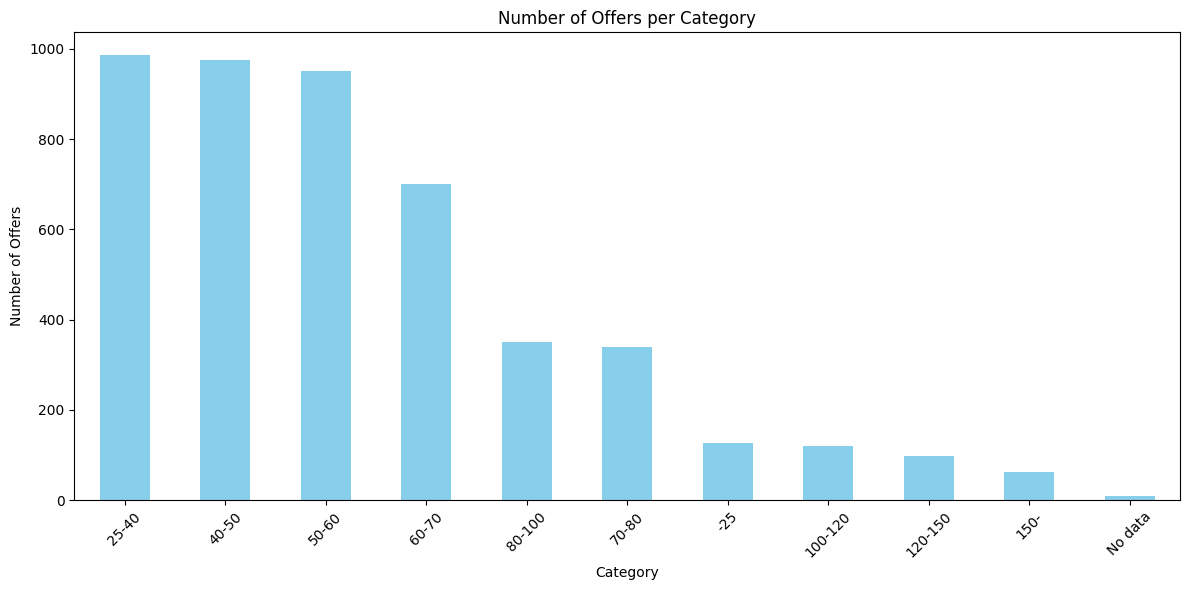

In [3]:
# Visualize the number of offers per category
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Offers per Category')
plt.xlabel('Category')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

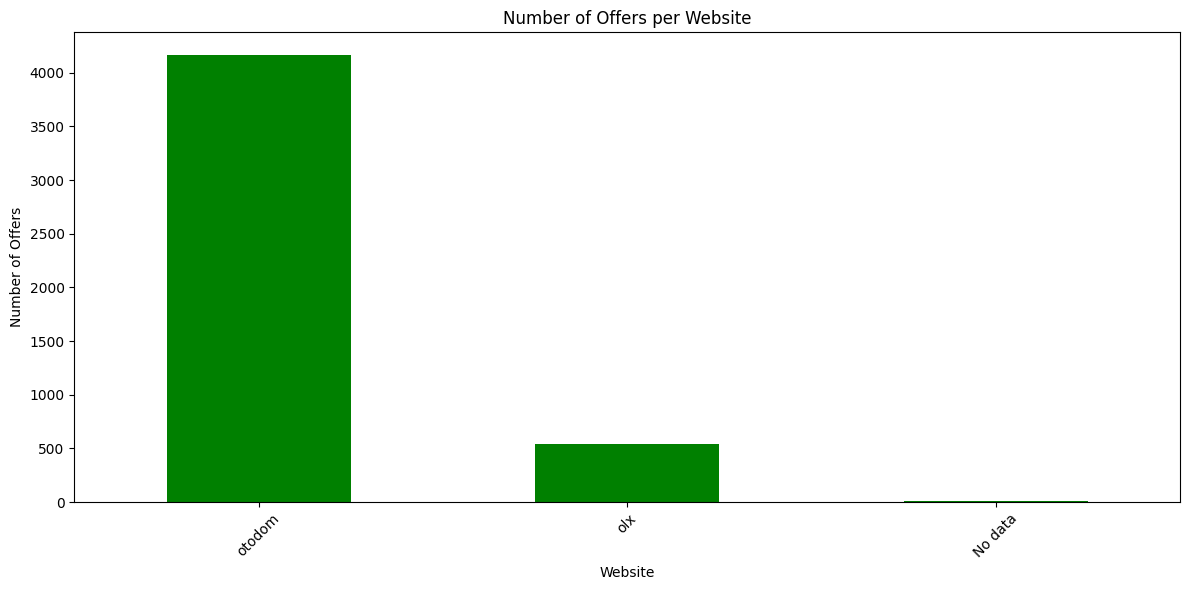

In [4]:
# Visualize the number of offers per website
plt.figure(figsize=(12, 6))
df['website'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Offers per Website')
plt.xlabel('Website')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

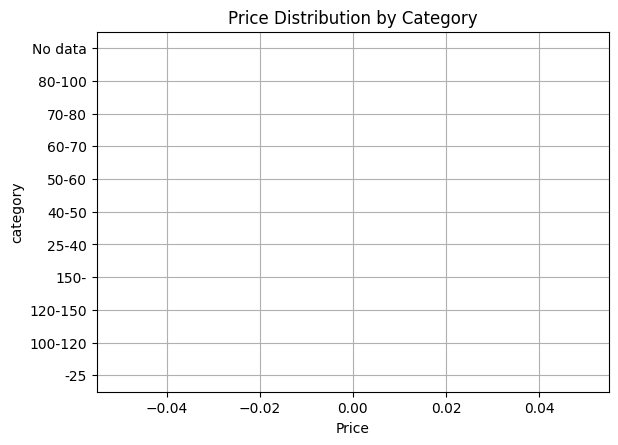

In [5]:
# visualize price distribution within categories if prices are numeric
# converting the price column from text to numeric, handling non-numeric entries also
df['price_numeric'] = pd.to_numeric(df['price'], errors='coerce')
plt.figure(figsize=(12, 6))
df.boxplot(column='price_numeric', by='category', vert=False)
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.suptitle('')
plt.show()

In [7]:
# Convert price to numeric, setting errors='coerce' will convert non-convertible values to NaN
df['price_numeric'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where price_numeric is NaN to ensure the boxplot can render
df_clean = df.dropna(subset=['price_numeric'])

if df_clean.groupby('category').size().min() > 1:  
    plt.figure(figsize=(12, 8))
    df_clean.boxplot(column='price_numeric', by='category', vert=False)
    plt.title('Price Distribution by Category')
    plt.xlabel('Price')
    plt.suptitle('')
    plt.show()
else:
    print("Not enough data points per category to display a meaningful box plot.")
# TODO : not working distribution diagram

Not enough data points per category to display a meaningful box plot.
